In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
%matplotlib inline

# Qu'est-ce qui fait qu'un jeux vidéo est bien noté ?

## Introduction

L'industrie du jeu vidéo est très importante et rentable.


>Cette année, on estime que le marché mondial des jeux génère 300 milliards de dollar (environ 263,10 milliards en €) grâce à 3,2 milliards de joueurs dans le monde.
>
>En comparaison, l'industrie mondiale du box-office valait 96,8 milliards de dollars (environ 84,35 milliards en €), tandis que les revenus mondiaux de la musique ont atteint 21,6 milliards de dollars (environ 18,83 millards en €) en 2021....

Ces dernières années, le secteur des "jeux indépendants" a connu une forte croissance. (Exemple : kena bridge of spirits ) De plus en plus de jeux sont très appréciés. Peut-être que la popularité et les ventes ne suffisent pas à faire un bon jeu. Spoiler : Twitch à l'heure actuelle fait énormément grossir les ventes.

Certains fabricants de jeux vidéo peuvent être intéressés par la création du meilleur jeu, qui offre la meilleure expérience au joueur, plutôt que par la réalisation du plus grand profit.

Exemple contraire : Battelfield 2042 pire bousse de tout les temps. Profit maximum pour un jeux de merde

L'indicateur pour réaliser cette étude est le : classement.

Exemple : Souvent nous nous referons au site metacritic : https://www.metacritic.com/

Je vais examiner les facteurs qui font qu'un jeu vidéo est très bien noté, ce qui est un composite du score des utilisateurs et du score des critiques de Metacritic. 

## Données 

Voici un jeu de données de Kaggle avec des détails sur 11563 titres de jeux vidéo.

URL : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

Il y a environ 6825 jeux vidéos dans le dataset.

Notre **variable cible** est la note globale du jeu vidéo obtenue en faisant la moyenne de :

- `User_score`
- `Critic_score`

Dans la suite, je ferais la moyenne des deux catégories, les joueurs sont la cible principale des jeux vidéo, mais les critiques ont une approche plus méthodique avec des critères plus spécifiques lors de la notation.

Pour déterminer les facteurs qui influent sur cette situation, je vais examiner les **caractéristiques** :

- `Year_of_Release`
- `Global_sales`
- `Genre`
- `Rating`
- `Platform`

### Importation des libraries et du dataset

In [108]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [109]:
dataGame = pd.read_csv("data.csv")

print("Valeurs moyennes pour chaque colonne : \n")
print(dataGame.mean(axis = 0))
dataGame

Valeurs moyennes pour chaque colonne : 

Year_of_Release    2006.487356
NA_Sales              0.263330
EU_Sales              0.145025
JP_Sales              0.077602
Other_Sales           0.047332
Global_Sales          0.533543
Critic_Score         68.967679
Critic_Count         26.360821
User_Count          162.229908
dtype: float64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Comme on peut le voir dans la cellule précédente, il y a de nombreuses lignes des 16719 points de données où il y a beaucoup de NaN. Je vais les retirer du dataset

Je vais aussi définir "Year_of_Release" comme un int. Pourquoi c'est en float dans le dataset, aucune idée..

In [110]:
#Supression des lignes ou il y a NaN
dataGame  = dataGame.dropna ()
dataGame = dataGame.reset_index(drop=True)

#Transformation en INT exemple : 2006.0 = 2006
dataGame.Year_of_Release = dataGame.Year_of_Release.astype(int)

dataGame

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Il reste maintenant 6825 titres à évaluer (environ 41% du CSV original).

La colonne `User_Score` présente quelques problèmes, car elle contient des valeurs non flottantes.

Pour corriger cela j'ajoute `Composite_rating` qui est une moyenne de `User_Score` et `Critic_Score`. Les critiques de jeux vidéo ont une approche plus entraînée de la notation (ce sont des journaliste.. Franchement parfois ils abusent..), tandis que les joueurs ont une méthode plus "votre jeu pue la merde ou votre jeu est trop bien".

Pour créer le score composite `Composite_rating`, j'ai décidé de multiplier `User_Score` par 10 puis faire la moyenne avec `Critic_score`, puisqu'il a une valeur maximale de 10 alors que le score des critiques a une valeur maximale de 100.

In [111]:
#Créer une catégorie de notation `Composite_rating`
#Source que j'ai utilisé pour les valeurs uniques: https://datascienceparichay.com/article/pandas-get-all-unique-values-in-a-column/#

# nombre de valeurs uniques 
print("nombre de notes : %d" % dataGame.User_Score.nunique())

#Transformer User_Score en float
dataGame.User_Score = dataGame.User_Score.astype(float)

# Ajout d'une cellule "Composite_rating" comme expliquer au dessus
dataGame["Composite_rating"] = (10* dataGame.User_Score + dataGame.Critic_Score)/2


dataGame

nombre de notes : 89


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Composite_rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,78.0
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,82.5
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,80.0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,87.0
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E,35.0
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,84.5
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,78.0
6823,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,59.5


In [112]:
print("nombre de Genres: %d" % dataGame.Genre.nunique())
print("nombre de Platformes: %d" % dataGame.Platform.nunique())
print("nombre de Développeurs: %d" % dataGame.Developer.nunique())
print("nombre de d'Éditeur: %d" % dataGame.Publisher.nunique())

nombre de Genres: 12
nombre de Platformes: 17
nombre de Développeurs: 1289
nombre de d'Éditeur: 262


<AxesSubplot:>

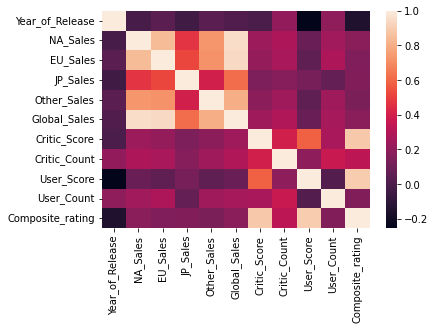

In [113]:
sns.heatmap(dataGame.corr())

Il est intéressant de noter que l'année de sortie semble avoir un effet négatif sur la notation, ce qui signifie que les jeux les plus récents ont tendance à être moins bien notés.

De mon expérience : Cela pourrait également être dû au fait que les jeux AAA sont produits dans les dernières années sont réalisé avec moins de soin et d'attention aux détails. (Exemple : Assassin's Creed qui est dévenu une triple bousse d'année en année).

Il existe un groupe de corrélation très élevée entre les ventes en Amérique du Nord, dans l'Union européenne, au Japon et dans les autres pays. Les ventes au Japon sont un peu moins corrélées aux trois autres car les trois autres sont entre elles. Peut-être que les Japonais ont des goûts spécifiques que l'Amérique du Nord, l'Union européenne et le reste du monde ne partagent pas entièrement.

In [114]:
dataGame = dataGame.drop(["User_Count","Critic_Count", "NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"], axis= 1)

In [115]:
dataGame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              6825 non-null   object 
 1   Platform          6825 non-null   object 
 2   Year_of_Release   6825 non-null   int64  
 3   Genre             6825 non-null   object 
 4   Publisher         6825 non-null   object 
 5   Global_Sales      6825 non-null   float64
 6   Critic_Score      6825 non-null   float64
 7   User_Score        6825 non-null   float64
 8   Developer         6825 non-null   object 
 9   Rating            6825 non-null   object 
 10  Composite_rating  6825 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 586.6+ KB


**Composite_rating**
_______________
Je vais commencer par Composite_rating, qui est la variable cible de l'ensemble. Elle décrit le classement composite des utilisateurs et des critiques de l'ensemble de données Metacritic.

La moyenne des notes sur Metacritic est d'environ 70. Donc c'est a peu près le score que j'attends pour "Composite_rating"

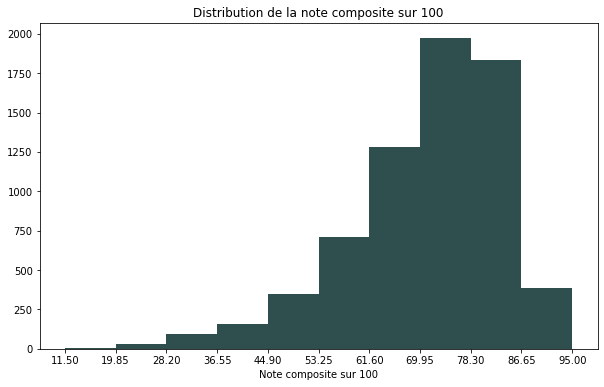

count    6825.000000
mean       71.064176
std        12.564423
min        11.500000
25%        64.500000
50%        73.500000
75%        80.000000
max        95.000000
Name: Composite_rating, dtype: float64

In [116]:
figure = plt.figure(figsize=(10, 6))

data = dataGame.Composite_rating

counts, divisions = np.histogram(data, range=( min(data),max(data)), bins=10)

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(data,  bins=divisions, color="darkslategray")
axes.set_title("Distribution de la note composite sur 100")
axes.set_xlabel("Note composite sur 100")
axes.set_xticks(bins)

plt.show()
data.describe()


La moyenne réelle était de ~71, donc notre estimation n'était pas très éloignée.

**Year_of_Release**
_______________

je vais voir si l'année de sortie affecte la note d'un jeu vidéo. La carte thermique montre qu'il peut y avoir une corrélation négative.

Je vais d'abord voir combien de titres sortent chaque année.

Spoiler : Le nombre baisse chaque année.

<Figure size 720x432 with 0 Axes>

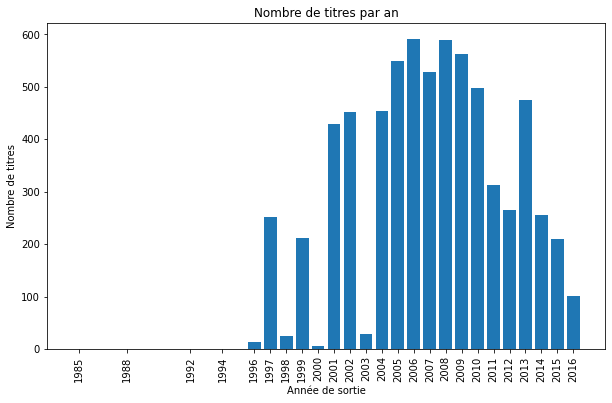

In [117]:
figure = plt.figure(figsize=(10, 6))

data = dataGame.Year_of_Release

figure = plt.figure(figsize=(10, 6))

VC = data.value_counts()
uniquePlatforms = data.unique()

plt.bar(uniquePlatforms , VC)
#print(dataGame.User_Score.unique())
plt.title('Nombre de titres par an')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de titres')
plt.xticks(np.unique(data) ,  rotation='vertical')

plt.show()


La création de jeux vidéo en termes de volume de classement metacritic. Le nombre maximal de titres classés par metacritic est apparu en 2006-2009, puis a diminué jusqu'en 2016. 

La quantité de jeux présentés de 1985 à 1995 est minuscule, ils seront donc retirés plus tard car ce petit ensemble pourrait avoir une incidence négative sur le modèle.

**Plateforme**
_______________

Je vais voir si la plateforme sur laquelle se trouve un jeu a un impact significatif sur le classement. Il y a 17 plateformes uniques dans la liste.

In [118]:
print("nombre de Platformes: %d" % dataGame.Platform.nunique())

nombre de Platformes: 17


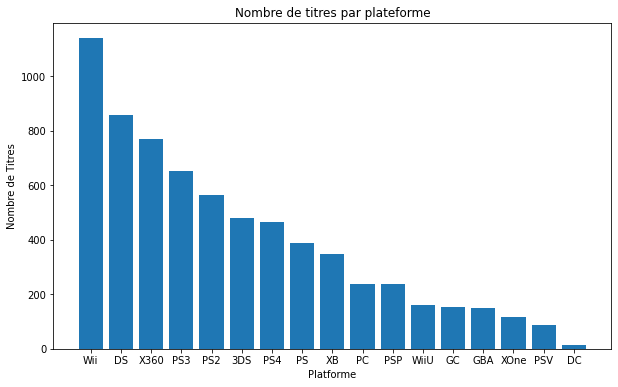

In [119]:
figure = plt.figure(figsize=(10, 6))

data = dataGame.Platform
VC = data.value_counts()
uniquePlatforms = data.unique()

plt.bar(uniquePlatforms , VC)
#print(dataGame.User_Score.unique())
plt.title('Nombre de titres par plateforme')
plt.xlabel('Platforme')
plt.ylabel('Nombre de Titres')

plt.show()


Aucune suprise pour la Wii, car Wii Sport et Mario Kart sont les jeux, les plus vendues de l'histoire

**Classement**
_______________

Le classement (public cible) d'un jeu affecte-t-il le classement composite (critiques + avis des utilisateurs) ?

Les jeux classés E sont les plus populaires parce qu'ils plaisent à tout le monde et peuvent avoir un contenu moins choquant ou non avilissant.

nombre de Notations: 7


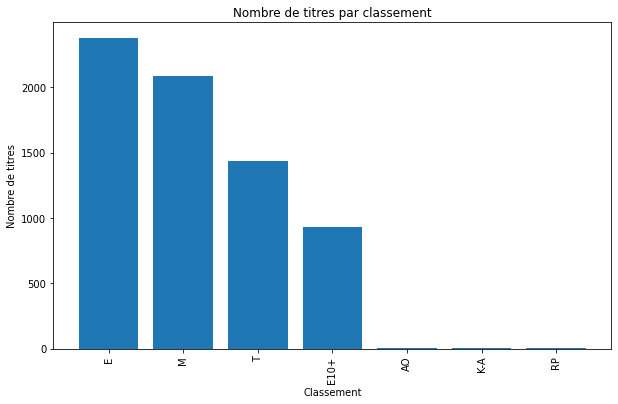

In [120]:
print("nombre de Notations: %d" % dataGame.Rating.nunique())

figure = plt.figure(figsize=(10, 6))

data = dataGame.Rating
VC = data.value_counts()
uniquePlatforms = data.unique()

plt.bar(uniquePlatforms , VC)
plt.title('Nombre de titres par classement')
plt.xlabel('Classement')
plt.ylabel('Nombre de titres')
plt.xticks( rotation='vertical')

plt.show()

Les seules classifications majeures sont E, M, T, et E10+. J'ignore les autres ça n'a pas d'intérêt.

**Genre**
_______________

Le genre d'un jeu a-t-il une incidence sur le classement ?

Il y a 12 genres uniques répertoriés.


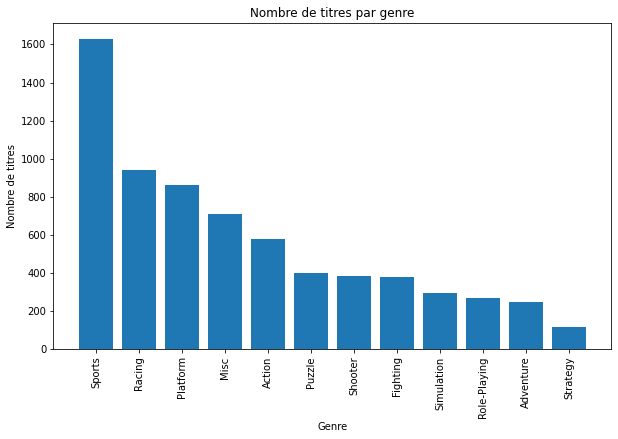

In [121]:
figure = plt.figure(figsize=(10, 6))

data = dataGame.Genre
VC = data.value_counts()
uniquePlatforms = data.unique()

plt.bar(uniquePlatforms , VC)
plt.title('Nombre de titres par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de titres')
plt.xticks( rotation='vertical')

plt.show()


Je ne pensais pas que le sport serait le genre le plus répandu, même si Wii Sport est l'un des jeux les plus vendu de l'histoire. Il ne faut pas oublier que nous sommes aussi en 2016. Aujourd'hui j'aimerais bien savoir, même si je pense que les jeux d'aventure et jeux FPS gagnent haut la main.

**Analyse : Ventes V. Cote composite**
_______________


Text(0.5, 1.0, 'Ventes par rapport à la note composite')

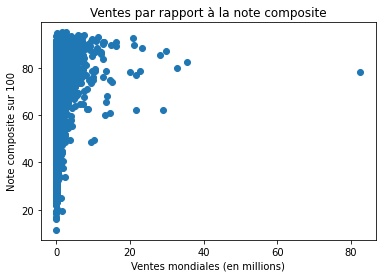

In [122]:
plt.scatter(dataGame.Global_Sales, dataGame.Composite_rating)
plt.xlabel('Ventes mondiales (en millions)')
plt.ylabel('Note composite sur 100')
plt.title("Ventes par rapport à la note composite")

Pour la suite, je vais supprimer Wii Sport, afin d'étudier si les classements sont vraiment corrélés aux ventes sans que Wii Sports n'affecte énormément la distribution.

**Suppression : Wii Sports**

In [123]:
dataGame = dataGame.drop(labels=None, axis=0, index= 0 , columns=None, level=None, inplace=False, errors='raise')

Text(0.5, 1.0, 'Ventes par rapport à la note composite')

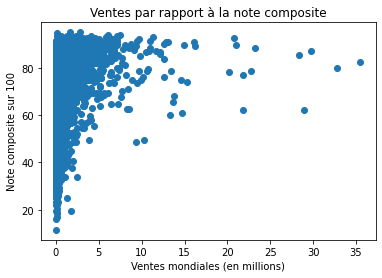

In [124]:
plt.scatter(dataGame.Global_Sales, dataGame.Composite_rating)
plt.xlabel('Ventes mondiales (en millions)')
plt.ylabel('Note composite sur 100')
plt.title("Ventes par rapport à la note composite")

La suppression de Wii Sports a rendu la distribution plus homogène. Cela montre que les jeux qui se vendent peu peuvent obtenir des scores élevés. Il semble y avoir une corrélation positive entre les ventes et les scores d'évaluation composite.

**Année de sortie**
__________

Text(0.5, 1.0, 'Année de sortie vs. Classement composite')

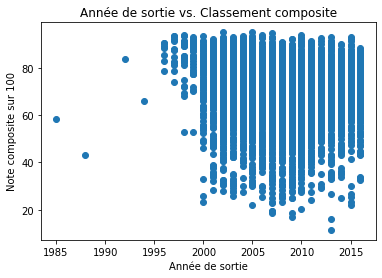

In [125]:
plt.scatter(dataGame.Year_of_Release, dataGame.Composite_rating)
plt.xlabel('Année de sortie')
plt.ylabel('Note composite sur 100')
plt.title("Année de sortie vs. Classement composite")

Je vais supprimer les données avant 2000 car elles n'ont pas d'intérêt, et puis je suis choqué savoir qu'il y a des gens qui ont ajouté des jeux avant 2000 sur metacritic xD

**Suppresion des jeux avant 2000 :**

Text(0.5, 1.0, 'Année de sortie Vs. Classement composite année 2000 - 2016')

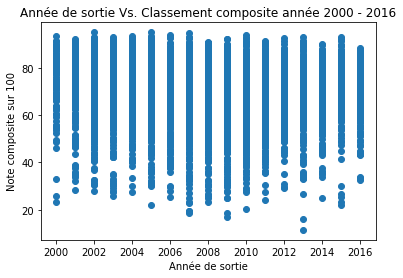

In [126]:
dataGame = dataGame[ dataGame.Year_of_Release >1999]

plt.scatter(dataGame.Year_of_Release, dataGame.Composite_rating)
plt.xlabel('Année de sortie')
plt.ylabel('Note composite sur 100')
plt.title("Année de sortie Vs. Classement composite année 2000 - 2016")

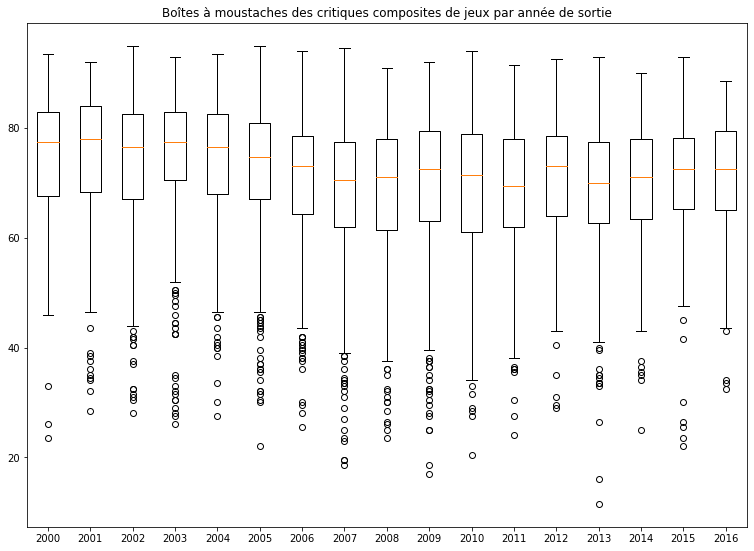

In [127]:
#References: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html#
years = np.unique(dataGame.Year_of_Release)
dataGame[dataGame["Year_of_Release"] == years[0] ]

data = []

# Boucler sur toutes les années et créer une liste des notes composites de l'année en question.
# Cela permettra de créer des diagrammes en boîte pour chaque année.
for year in years:
    year_data = dataGame[dataGame["Year_of_Release"] == year ] 
    data.append(year_data["Composite_rating"])

fig = plt.figure(figsize =(10, 7))
# Création d'une instance d'axes
ax = fig.add_axes([0, 0, 1, 1])
#plt.xticks(labels = years)
ax.set_xticklabels(years)
# Création d'un plot
bp = ax.boxplot(data)

plt.title("Boîtes à moustaches des critiques composites de jeux par année de sortie")
plt.show()

Je pense qu'il y a une relation entre la qualité et la quantité ? Exemple concret récent : Remaster des jeux GTA,  3 GTA exactement, tous on pué littéralement la merde (BUG, Portage mobile) La quantité ne fait pas la qualité.

Maintenant, je vais vérifier les données :

In [128]:
dataGame_genre = pd.concat([dataGame, pd.get_dummies(dataGame["Genre"])], axis=1)

dataGame_genre

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Rating,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.52,82.0,8.3,Nintendo,E,...,0,0,0,0,1,0,0,0,0,0
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,32.77,80.0,8.0,Nintendo,E,...,0,0,0,0,0,0,0,0,1,0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,29.80,89.0,8.5,Nintendo,E,...,0,0,1,0,0,0,0,0,0,0
4,Wii Play,Wii,2006,Misc,Nintendo,28.92,58.0,6.6,Nintendo,E,...,0,1,0,0,0,0,0,0,0,0
5,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.32,87.0,8.4,Nintendo,E,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,46.0,2.4,Fluid Studios,E,...,0,0,0,0,0,0,0,0,0,0
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,81.0,8.8,Criterion Games,M,...,1,0,0,0,0,0,0,0,0,0
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.01,80.0,7.6,Kojima Productions,M,...,0,0,0,0,0,0,0,0,0,0
6823,Breach,PC,2011,Shooter,Destineer,0.01,61.0,5.8,Atomic Games,T,...,0,0,0,0,0,0,1,0,0,0


In [129]:

dataGame_rating = pd.concat([dataGame, pd.get_dummies(dataGame["Rating"])], axis=1)

dataGame_rating = dataGame_rating.rename(columns={"E10+":"E10plus"})

dataGame_rating

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Developer,Rating,Composite_rating,AO,E,E10plus,M,RP,T
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.52,82.0,8.3,Nintendo,E,82.5,0,1,0,0,0,0
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,32.77,80.0,8.0,Nintendo,E,80.0,0,1,0,0,0,0
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,29.80,89.0,8.5,Nintendo,E,87.0,0,1,0,0,0,0
4,Wii Play,Wii,2006,Misc,Nintendo,28.92,58.0,6.6,Nintendo,E,62.0,0,1,0,0,0,0
5,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.32,87.0,8.4,Nintendo,E,85.5,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,46.0,2.4,Fluid Studios,E,35.0,0,1,0,0,0,0
6821,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,81.0,8.8,Criterion Games,M,84.5,0,0,0,1,0,0
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.01,80.0,7.6,Kojima Productions,M,78.0,0,0,0,1,0,0
6823,Breach,PC,2011,Shooter,Destineer,0.01,61.0,5.8,Atomic Games,T,59.5,0,0,0,0,0,1


# Conclusion

Cet aperçu fournit une analyse explicative des facteurs en corrélation avec une note composite élevée pour un jeu vidéo (moyenne metacritic des notes des utilisateurs et des critiques).

**Année de sortie**

Il existe une légère tendance négative entre l'année de sortie et le score.

**Ventes**

Il y avait une tendance positive entre les ventes globales et les classements composites.

**Genre**

Il y avait des effets significatifs du Genre sur le score composite obtenu. 

**Classification par âge**

Les jeux classés M ont les notes moyennes les plus élevées parmi les catégories "E", "T" et "M". 
